In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['users.dat', 'ratings.dat', 'movies.dat']


In [2]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('../input/movies.dat', sep = '::', engine='python')
df_movie.columns =['MovieID','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieID,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("../input/ratings.dat",sep='::', engine='python')
df_rating.columns =['UserID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()


,UserID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
#Data acquisition of the users dataset
df_user = pd.read_csv("../input/users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [5]:
df=df_movie.merge(df_rating,on='MovieID')

In [6]:
df=df.merge(df_user,on='UserID')

In [7]:
df.head()

,MovieID,MovieName,Category,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370
1,7,Sabrina (1995),Comedy|Romance,10,4,978227763,F,35,1,95370
2,24,Powder (1995),Drama|Sci-Fi,10,3,978230586,F,35,1,95370
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,979168160,F,35,1,95370
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,978230090,F,35,1,95370


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 10 columns):
MovieID       998080 non-null int64
MovieName     998080 non-null object
Category      998080 non-null object
UserID        998080 non-null int64
Ratings       998080 non-null int64
TimeStamp     998080 non-null int64
Gender        998080 non-null object
Age           998080 non-null int64
Occupation    998080 non-null int64
Zip-code      998080 non-null object
dtypes: int64(6), object(4)
memory usage: 83.8+ MB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df_final=df.drop(['Zip-code','TimeStamp','Category','UserID','MovieName'],axis=1)
df_final.head()

,MovieID,Ratings,Gender,Age,Occupation
0,2,5,F,35,1
1,7,4,F,35,1
2,24,3,F,35,1
3,32,5,F,35,1
4,48,4,F,35,1


In [11]:
df_final.drop_duplicates(inplace=True)

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487177 entries, 0 to 998065
Data columns (total 5 columns):
MovieID       487177 non-null int64
Ratings       487177 non-null int64
Gender        487177 non-null object
Age           487177 non-null int64
Occupation    487177 non-null int64
dtypes: int64(4), object(1)
memory usage: 22.3+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_final['Gender']= labelencoder.fit_transform(df_final['Gender'])
df_final.head()

,MovieID,Ratings,Gender,Age,Occupation
0,2,5,0,35,1
1,7,4,0,35,1
2,24,3,0,35,1
3,32,5,0,35,1
4,48,4,0,35,1


In [14]:
df_final.shape

(487177, 5)

In [15]:
df_final.describe()

,MovieID,Ratings,Gender,Age,Occupation
count,487177.000000,487177.000000,487177.000000,487177.000000,487177.000000
mean,1929.083696,3.382374,0.674820,32.067087,8.699267
std,1110.657250,1.192660,0.468442,12.933103,6.685921
min,2.000000,1.000000,0.000000,1.000000,0.000000
25%,1037.000000,3.000000,0.000000,25.000000,2.000000
50%,1961.000000,3.000000,1.000000,25.000000,7.000000
75%,2867.000000,4.000000,1.000000,45.000000,15.000000
max,3952.000000,5.000000,1.000000,56.000000,20.000000


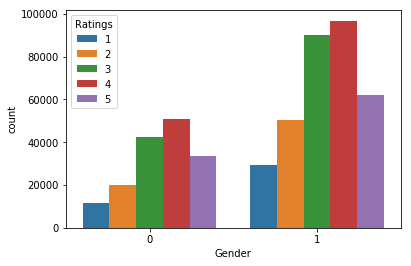

In [16]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

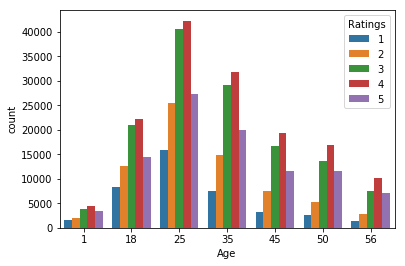

In [17]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

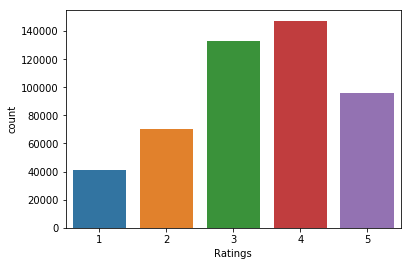

In [18]:
sns.countplot(x=df_final['Ratings'])

In [19]:
X=df_final[['Age','Gender','MovieID','Occupation']]
y=df_final['Ratings']

In [20]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=52,test_size=0.20)

In [21]:
print(X_train.shape)
print(y_test.shape)

(389741, 4)
(97436,)


In [22]:
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
acc_random_forest

60.54

In [23]:
input=pd.DataFrame(np.array([[25,1,346,16]]),columns=['Age', 'Gender','MovieID','Occupation'])
input

,Age,Gender,MovieID,Occupation
0,25,1,346,16


In [24]:
prediction = random_forest.predict(input)
prediction

array([2])